## Creating a Lateral Inhibition System

# 

# 

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# initialize variables
dim = 80
halfdim = 40
num_iterations = 5
length_constant = 2
EPSILON = 0.1
max_inhibition = 0.1


def initialize_parameters():
    global max_inhibition, length_constant, EPSILON
    max_inhibition = float(input("Inhibitory Maximum Strength: "))
    max_inhibition = abs(MAX_STRENGTH)
    length_constant = float(input("Inhibitory Length Constant: "))
    EPSILON = float(input("Epsilon: "))



#Build weight matrix\
def build_weight_matrix(dim, max_inhibition, length_constant):
    dist_matrix = np.zeros((dim, dim))
    halfdim = dim // 2
    for i in range(dim):
        for j in range(dim):
            dist = abs(j - i)
            if dist > halfdim:
                dist = dim - dist
            dist_matrix[i, j] = dist
    weight_matrix = np.empty((dim, dim))
    for i in range(dim):
        for j in range(dim):
            weight_matrix[i, j] = -(max_inhibition * np.exp(-(dist_matrix[i, j] / length_constant)))
    return weight_matrix

weight_mat = build_weight_matrix(dim, max_inhibition, length_constant)

# Create initial state vector
def build_initial_state_vector(dim, low, high):
    initial_state_vector = np.zeros((dim, 1))
    halfdim = dim // 2
    initial_state_vector[:halfdim] = low
    initial_state_vector[halfdim:] = high
    return initial_state_vector

initial_state_vector = build_initial_state_vector(dim, 10, 40)
state_vector = np.copy(initial_state_vector)

def compute_inhibited_state_vector(state_vector, inhibitory_weights, initial_state_vector, discreet_time_units, EPSILON):
    new_state_vector = np.zeros(dim)
    for t in range(discreet_time_units):
        state_vector_copy = state_vector
        for i in range(dim):
            Sigma = 0
            for j in range(dim):
                eachsum = inhibitory_weights[j,i] * state_vector_copy[j]
                Sigma = Sigma + eachsum
            Sigma = Sigma + initial_state_vector[i] - state_vector_copy[i]
            new_state_vector[i] = state_vector[i] + EPSILON * Sigma
        state_vector = np.copy(new_state_vector)
    return state_vector




In [14]:
state_vector = compute_inhibited_state_vector(state_vector, weight_mat, initial_state_vector, num_iterations, EPSILON)

print(state_vector)

[ 4.00856837  5.38701387  6.15280595  6.57800691  6.81397021  6.94484837
  7.01740367  7.05760662  7.07987264  7.09219893  7.09901979  7.10279265
  7.10487873  7.10603166  7.10666843  7.10701959  7.1072124   7.10731677
  7.10737057  7.10739334  7.10739334  7.10737057  7.10731677  7.1072124
  7.10701959  7.10666843  7.10603166  7.10487873  7.10279265  7.09901979
  7.09219893  7.07987264  7.05760662  7.01740367  6.94484837  6.81397021
  6.57800691  6.15280595  5.38701387  4.00856837 31.52871222 30.15026672
 29.38447464 28.95927368 28.72331039 28.59243222 28.51987693 28.47967397
 28.45740796 28.44508166 28.4382608  28.43448794 28.43240186 28.43124893
 28.43061216 28.430261   28.43006819 28.42996383 28.42991002 28.42988725
 28.42988725 28.42991002 28.42996383 28.43006819 28.430261   28.43061216
 28.43124893 28.43240186 28.43448794 28.4382608  28.44508166 28.45740796
 28.47967397 28.51987693 28.59243222 28.72331039 28.95927368 29.38447464
 30.15026672 31.52871222]


[ 4.00856837  5.38701387  6.15280595  6.57800691  6.81397021  6.94484837
  7.01740367  7.05760662  7.07987264  7.09219893  7.09901979  7.10279265
  7.10487873  7.10603166  7.10666843  7.10701959  7.1072124   7.10731677
  7.10737057  7.10739334  7.10739334  7.10737057  7.10731677  7.1072124
  7.10701959  7.10666843  7.10603166  7.10487873  7.10279265  7.09901979
  7.09219893  7.07987264  7.05760662  7.01740367  6.94484837  6.81397021
  6.57800691  6.15280595  5.38701387  4.00856837 31.52871222 30.15026672
 29.38447464 28.95927368 28.72331039 28.59243222 28.51987693 28.47967397
 28.45740796 28.44508166 28.4382608  28.43448794 28.43240186 28.43124893
 28.43061216 28.430261   28.43006819 28.42996383 28.42991002 28.42988725
 28.42988725 28.42991002 28.42996383 28.43006819 28.430261   28.43061216
 28.43124893 28.43240186 28.43448794 28.4382608  28.44508166 28.45740796
 28.47967397 28.51987693 28.59243222 28.72331039 28.95927368 29.38447464
 30.15026672 31.52871222]


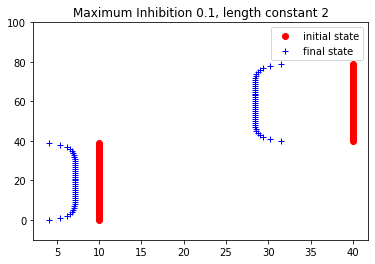

In [23]:
print(state_vector)

# Plot graph\
y = initial_state_vector
x = range(dim)
plt.plot(y,x, 'o',color="red", label="initial state")
plt.legend(numpoints=1)
plt.ylim(0,50)


# Plot final State vector
y = state_vector
x = range(dim)
plt.plot(y,x,'+',color="blue", label="final state")
plt.legend(numpoints=1)
plt.ylim(-10,100)
plt.title("Maximum Inhibition 0.1, length constant 2")
plt.show()